<a href="https://colab.research.google.com/github/yusukennn/pytorch_prac/blob/main/tonyo_kaiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 必要なパッケージのインストール
!pip3 install torch==1.6.0+cu101
!pip3 install torchvision==0.7.0+cu101
!pip3 install numpy==1.18.5
!pip3 install matplotlib==3.2.2
!pip3 install scikit-learn==0.23.1
!pip3 install seaborn==0.11.0

ERROR: Could not find a version that satisfies the requirement torch==1.6.0+cu101 (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2, 0.3.1, 0.4.0, 0.4.1, 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.3.0, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1)
ERROR: No matching distribution found for torch==1.6.0+cu101
ERROR: Could not find a version that satisfies the requirement torchvision==0.7.0+cu101 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.8.0, 0.8.1, 0.8.2)
ERROR: No matching distribution found for torchvision==0.7.0+cu101
     |████████████████████████████████| 20.1MB 38.1MB/s 
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.

     |████████████████████████████████| 6.9MB 6.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 286kB 7.9MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [ ]:
# 必要なパッケージのインストール
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.nn.functional as F
from torch import optim

# 糖尿病　データセット

In [ ]:
# データセットのロード
diabetes = load_diabetes()

In [ ]:
# データセットの説明
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [ ]:
# データフレームに変換
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# 1年後の進行度の追加
df['target'] = diabetes.target
print(df.head())

        age       sex       bmi        bp  ...        s4        s5        s6  target
0  0.038076  0.050680  0.061696  0.021872  ... -0.002592  0.019908 -0.017646   151.0
1 -0.001882 -0.044642 -0.051474 -0.026328  ... -0.039493 -0.068330 -0.092204    75.0
2  0.085299  0.050680  0.044451 -0.005671  ... -0.002592  0.002864 -0.025930   141.0
3 -0.089063 -0.044642 -0.011595 -0.036656  ...  0.034309  0.022692 -0.009362   206.0
4  0.005383 -0.044642 -0.036385  0.021872  ... -0.002592 -0.031991 -0.046641   135.0

[5 rows x 11 columns]


In [ ]:
print(df.describe())

                age           sex  ...            s6      target
count  4.420000e+02  4.420000e+02  ...  4.420000e+02  442.000000
mean  -3.634285e-16  1.308343e-16  ... -3.412882e-16  152.133484
std    4.761905e-02  4.761905e-02  ...  4.761905e-02   77.093005
min   -1.072256e-01 -4.464164e-02  ... -1.377672e-01   25.000000
25%   -3.729927e-02 -4.464164e-02  ... -3.317903e-02   87.000000
50%    5.383060e-03 -4.464164e-02  ... -1.077698e-03  140.500000
75%    3.807591e-02  5.068012e-02  ...  2.791705e-02  211.500000
max    1.107267e-01  5.068012e-02  ...  1.356118e-01  346.000000

[8 rows x 11 columns]


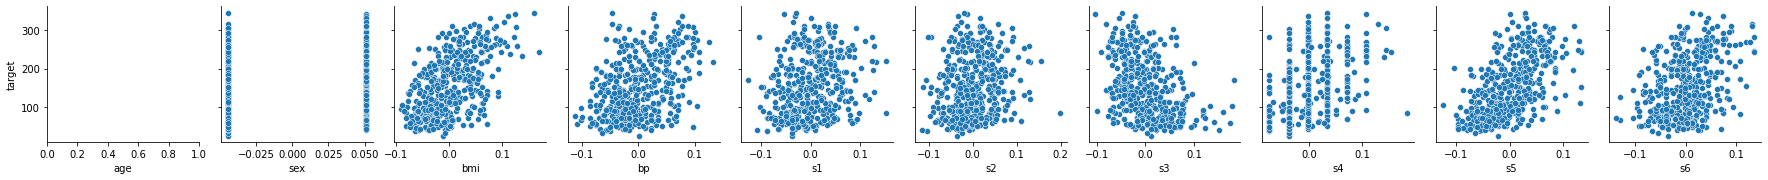

In [ ]:
# データセットの可視化
sns.pairplot(df, x_vars=diabetes.feature_names, y_vars='target')
plt.show()

# 前準備

In [ ]:
# データセットの読み込み
diabetes = load_diabetes()
data = diabetes.data #特徴量
label = diabetes.target.reshape(-1, 1)  # 一年後の糖尿病の進行度

# データセットのサイズの確認
print("data size: {}".format(data.shape))
print("label size: {}".format(label.shape))

data size: (442, 10)
label size: (442, 1)


# 訓練データとテストデータの用意

In [ ]:
# 学習データとテストデータを分割
train_data, test_data, train_label, test_label = train_test_split(
    data, label, test_size=0.2)

# 学習データとテストデータのサイズの確認
print("train_data size: {}".format(len(train_data)))
print("test_data size: {}".format(len(test_data)))
print("train_label size: {}".format(len(train_label)))
print("test_label size: {}".format(len(test_label)))

train_data size: 353
test_data size: 89
train_label size: 353
test_label size: 89


In [ ]:
# ndarrayをPyTorchのTensorに変換
train_x = torch.Tensor(train_data)
test_x = torch.Tensor(test_data)
train_y = torch.Tensor(train_label)  # torch.float32のデータ型に
test_y = torch.Tensor(test_label)  # torch.float32のデータ型に

In [ ]:
# 特徴量とラベルを結合したデータセットを作成
train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

In [ ]:
# ミニバッチサイズを指定したデータローダーを作成
train_batch = DataLoader(
    dataset=train_dataset,
    batch_size=20,
    shuffle=True,
    num_workers=2
)
test_batch = DataLoader(
    dataset=test_dataset,
    batch_size=20,
    shuffle=False,
    num_workers=2
)

# ミニバッチデータセットの確認
for data, label in train_batch:
  print("batch data size: {}".format(data.size()))
  print("batch label size: {}".format(label.size()))
  break

batch data size: torch.Size([20, 10])
batch label size: torch.Size([20, 1])


# ニューラルネットワークの定義

In [ ]:
class Net(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, H)
    self.linear3 = nn.Linear(H, D_out)
    self.dropout = nn.Dropout(p=0.5)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = F.relu(self.linear2(x))
    x = self.dropout(x)
    x = self.linear3(x)
    return x

In [ ]:
# ハイパーパラメータの定義
D_in = 10  # 入力次元: 10
H = 200  # 隠れ層次元: 200
D_out = 1  # 出力次元: 1
epoch = 100  # 学習回数: 100

In [ ]:
# ネットワークのロード
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Net(D_in, H, D_out).to(device)
# デバイスの確認
print("Device: {}".format(device))

Device: cuda


# 損失関数と最適化関数の定義

In [ ]:
# 損失関数の定義
criterion = nn.MSELoss()  # 今回の損失関数（平均二乗誤差: MSE）
criterion2 = nn.L1Loss()  # 参考用（平均絶対誤差: MAE）

# 最適化関数の定義
optimizer = optim.Adam(net.parameters())

# 学習

In [ ]:
# 損失を保存するリストを作成
train_loss_list = []  # 学習損失（MSE）
test_loss_list = []  # 評価損失（MSE）
train_mae_list = []  # 学習MAE
test_mae_list = []  # 評価MAE

# 学習（エポック）の実行
for i in range(epoch):
  print('-------------------------------------')
  print("Epoch: {}/{}".format(i+1, epoch))

  train_loss = 0
  test_loss = 0
  train_mae = 0
  test_mae = 0

  #------------学習パート--------------#
  net.train()
  for data, label in train_batch:
    data = data.to(device)
    label = label.to(device)

    optimizer.zero_grad() # 勾配を初期化
    y_pred = net(data)  # データを入力して予測値を計算（順伝播）
    loss = criterion(y_pred, label)  # MSE
    mae = criterion2(y_pred, label)  # MAE

    loss.backward()  # 勾配の計算（逆伝播）
    optimizer.step()  #　パラメータ（重み）の更新
    
    train_loss += loss.item()
    train_mae += mae.item()

  batch_train_loss = train_loss / len(train_batch)
  batch_train_mae = train_mae / len(train_batch)
  #-----------学習パートここまで--------#

  #------------評価パート--------------#
  net.eval() # nnを評価モードに設定
  with torch.no_grad():
    for data, label in test_batch:
      data = data.to(device)
      label = label.to(device)
      y_pred = net(data)  # データを入力して予測値を計算（順伝播）
      loss = criterion(y_pred, label)
      mae = criterion2(y_pred, label)

      test_loss += loss.item()
      test_mae += mae.item()

  batch_test_loss = test_loss / len(test_batch)
  batch_test_mae = test_mae / len(test_batch)
  #--------------評価パートはここまで-------#

  # エポックごとに損失を表示
  print("Train_Loss: {:.4f} Train_MAE: {:.4f}".format(
      batch_train_loss, batch_train_mae))
  print("Test_Loss: {:.4f} Test_MAE: {:.4f}".format(
      batch_test_loss, batch_test_mae))
  # 損失をリスト化して保存
  train_loss_list.append(batch_train_loss)
  test_loss_list.append(batch_test_loss)
  train_mae_list.append(batch_train_mae)
  test_mae_list.append(batch_test_mae)




-------------------------------------
Epoch: 1/100
Train_Loss: 29432.0596 Train_MAE: 153.8836
Test_Loss: 26307.4723 Test_MAE: 139.7306
-------------------------------------
Epoch: 2/100
Train_Loss: 27138.0400 Train_MAE: 146.5445
Test_Loss: 22271.3297 Test_MAE: 124.5688
-------------------------------------
Epoch: 3/100
Train_Loss: 18863.7991 Train_MAE: 113.7360
Test_Loss: 10581.6377 Test_MAE: 74.8828
-------------------------------------
Epoch: 4/100
Train_Loss: 6332.1348 Train_MAE: 64.7237
Test_Loss: 7472.6787 Test_MAE: 77.3884
-------------------------------------
Epoch: 5/100
Train_Loss: 5855.7411 Train_MAE: 65.5902
Test_Loss: 5690.8690 Test_MAE: 64.5573
-------------------------------------
Epoch: 6/100
Train_Loss: 4777.9549 Train_MAE: 57.8076
Test_Loss: 5470.5526 Test_MAE: 63.2732
-------------------------------------
Epoch: 7/100
Train_Loss: 4769.1018 Train_MAE: 59.0077
Test_Loss: 5323.6993 Test_MAE: 62.5721
-------------------------------------
Epoch: 8/100
Train_Loss: 4497.6422

# 結果の可視化

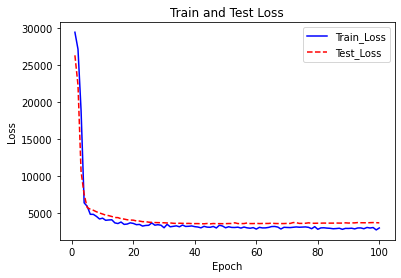

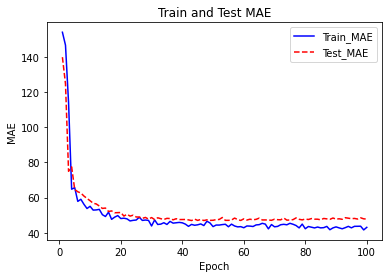

In [ ]:
# 損失(MSE)
plt.figure()
plt.title('Train and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, epoch+1), train_loss_list, color='blue',
         linestyle='-', label='Train_Loss')
plt.plot(range(1,epoch+1), test_loss_list, color='red',
         linestyle='--', label='Test_Loss')
plt.legend()

# MAE
plt.figure()
plt.title('Train and Test MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(range(1, epoch+1), train_mae_list, color='blue',
         linestyle='-', label='Train_MAE')
plt.plot(range(1, epoch+1), test_mae_list, color='red',
         linestyle='--', label='Test_MAE')
plt.legend()  # 凡例

# 表示
plt.show()